In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# [데이터 불러오기 및 전처리]

In [12]:
df_org=pd.read_csv('./Dataset.csv')

In [13]:
df_org

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X232,X233,X234,X235,X236,X237,X238,X239,X240,y
0,1,-9.448304,-1.987827,-1.106673,-14.061762,4.843485,0.091583,-5.576920,7.719629,-1.863910,...,3.587670,6.600736,-3.381231,-0.251434,3.241419,6.845331,-3.343007,0.115712,3.405557,0
1,2,1.302511,2.899409,-0.042904,1.109262,3.433958,-0.248045,-7.654446,2.689923,-0.896471,...,2.323888,-0.989782,-10.544422,1.589346,2.298016,-0.648038,-10.883723,1.446712,2.676828,0
2,3,-1.379652,8.201124,0.995060,-4.423659,12.059559,0.247173,1.816370,0.409980,-3.941379,...,-1.772770,-1.634974,-2.106080,0.174177,-1.836660,-1.654337,-2.154169,0.187626,-1.441361,2
3,4,2.934346,7.768061,-1.899012,-4.251139,6.262658,1.095281,-7.220438,6.296314,4.897685,...,1.735532,-4.465734,-6.769006,0.172765,1.773931,-4.767236,-7.075480,0.267649,1.921969,0
4,5,-0.024623,-4.295712,-0.463044,1.281289,-1.149880,-0.081947,-13.990144,6.870692,4.481896,...,1.043425,-7.352583,-0.552977,0.227430,0.770388,-7.416051,-0.488253,0.056843,0.670714,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,-11.344074,-14.211219,0.183840,-3.105873,-1.040898,0.320777,-19.587427,-9.541800,-1.895140,...,0.274840,-0.157604,-11.413381,1.443459,0.293066,-0.319379,-11.393030,1.124011,0.014501,0
7996,7997,1.457657,6.003109,-0.324315,9.117670,0.276091,0.264915,7.033853,3.136482,0.370668,...,1.026722,8.636046,-5.845699,0.325375,1.034953,8.804298,-6.286691,0.048683,1.199638,1
7997,7998,-4.478895,-9.747708,0.800840,8.241189,0.054204,0.755706,2.973006,15.436403,-11.855388,...,1.183007,2.296683,-1.444066,1.040406,1.095537,2.287108,-1.713684,0.774606,1.511261,2
7998,7999,8.218508,0.895687,-1.521345,3.304286,-8.048433,-0.570584,-11.145129,2.236451,-1.469484,...,0.391788,6.125785,2.406524,-0.879442,0.610899,6.123989,2.239397,-0.694566,0.438426,1


In [14]:
# y 열의 고유한 값의 개수를 확인합니다.
y_value_counts = df_org['y'].value_counts()

print("y 열의 각 값의 개수:")
print(y_value_counts)

y 열의 각 값의 개수:
y
0    2024
2    1999
1    1989
3    1988
Name: count, dtype: int64


## - 결측치 제거

In [15]:
df_org.isna().sum()

ID       0
X1      18
X2      26
X3      18
X4      21
        ..
X237    12
X238    16
X239    24
X240    25
y        0
Length: 242, dtype: int64

In [16]:
df = df_org.dropna()

## - 데이터셋 분리

In [17]:
# 입력 변수와 출력 변수 분리
X = df.drop(columns=['ID', 'y'])  # 입력 변수
y = df['y']  # 출력 변수

In [18]:
# 비율 5:3:2 & random_state=34
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=34)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=34)

## - 변수 스케일링

In [19]:
# 훈련 데이터셋을 기준으로 스케일러 학습
scaler = StandardScaler()
scaler.fit(X_train)

# 훈련, 검증, 테스트 데이터셋 스케일링 
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## 훈련, 검증, 테스트 데이터셋 스케일링 columns=X.columns로 변수명 동일하게 설정
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# [문제 1]

## - 모델 구축

In [20]:
#random_state = 21

In [21]:
# XGBClassifier 모델 정의

gamma_list = list(np.arange(0,10,0.5))

train_scores =[]
valid_scores = [] 
test_scores =[]

for gamma in gamma_list:
    
    model = XGBClassifier(use_label_encoder = False,
                            random_state = 21,
                            n_estimators = 100,
                            learning_rate = 0.4,
                            min_child_weight = 1,
                            colsample_bytree = 1,
                            max_depth =  6, 
                            gamma = gamma, 
                            reg_lambda = 1,
                            eval_metric='logloss')

    # 모델 학습
    model.fit(X_train_scaled, y_train)

    # 예측
    y_pred_train = model.predict(X_train_scaled)
    y_pred_valid = model.predict(X_valid_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # f1-score와 accuracy 출력
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    valid_f1_score = f1_score(y_valid, y_pred_valid, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
    
    train_scores.append(train_f1_score) # 훈련성능 저장
    valid_scores.append(valid_f1_score)
    test_scores.append(test_f1_score)



최적의 gamma 값: 0.0


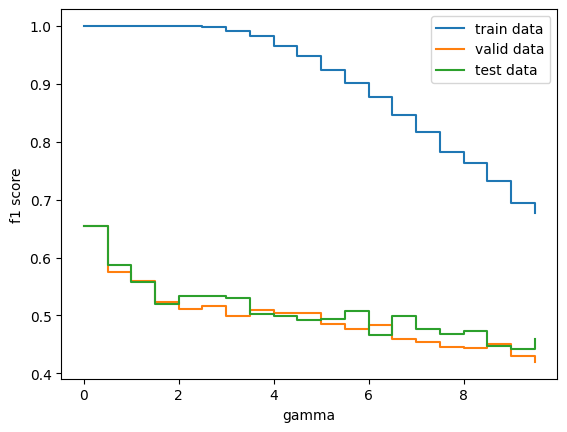

In [23]:
best_gamma = gamma_list[np.argmax(test_scores)]
print(f"최적의 gamma 값: {best_gamma}")

fig, ax = plt.subplots()
ax.set_xlabel("gamma")
ax.set_ylabel("f1 score")

ax.plot(gamma_list, train_scores,  label="train data", drawstyle="steps-post")
ax.plot(gamma_list, valid_scores,  label="valid data", drawstyle="steps-post")
ax.plot(gamma_list, test_scores,  label="test data", drawstyle="steps-post")


ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')

In [24]:
# gamma 는 0으로 설정

In [25]:
# XGBClassifier 모델 정의

reg_lambda_list = list(np.arange(0,10,1))

train_scores =[]
valid_scores = [] 
test_scores =[]

for reg_lambda in reg_lambda_list:
    
    model = XGBClassifier(use_label_encoder = False,
                            random_state = 21,
                            n_estimators = 100,
                            learning_rate = 0.4,
                            min_child_weight = 1,
                            colsample_bytree = 1,
                            max_depth =  6, 
                            gamma = 0, 
                            reg_lambda = reg_lambda,
                            eval_metric='logloss')

    # 모델 학습
    model.fit(X_train_scaled, y_train)

    # 예측
    y_pred_train = model.predict(X_train_scaled)
    y_pred_valid = model.predict(X_valid_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # f1-score와 accuracy 출력
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    valid_f1_score = f1_score(y_valid, y_pred_valid, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
    
    train_scores.append(train_f1_score) # 훈련성능 저장
    valid_scores.append(valid_f1_score)
    test_scores.append(test_f1_score)



최적의 lambda 값: 2


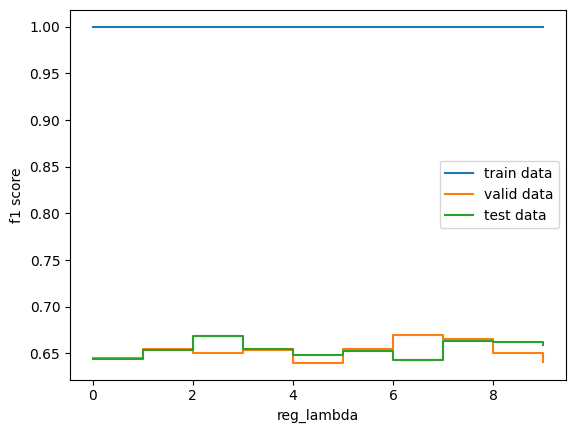

In [26]:
best_lambda = reg_lambda_list[np.argmax(test_scores)]
print(f"최적의 lambda 값: {best_lambda}")

fig, ax = plt.subplots()
ax.set_xlabel("reg_lambda")
ax.set_ylabel("f1 score")

ax.plot(reg_lambda_list, train_scores,  label="train data", drawstyle="steps-post")
ax.plot(reg_lambda_list, valid_scores,  label="valid data", drawstyle="steps-post")
ax.plot(reg_lambda_list, test_scores,  label="test data", drawstyle="steps-post")


ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')

In [18]:
# reg_lambda 는 2로 설정

In [27]:
final_clf = XGBClassifier(use_label_encoder = False,
                        random_state = 21,
                        n_estimators = 100,
                        learning_rate = 0.4,
                        min_child_weight = 1,
                        colsample_bytree = 1,
                        max_depth =  6, 
                        gamma = 0, 
                        reg_lambda = 2,
                        eval_metric='logloss')

# 모델 학습
final_clf.fit(X_train_scaled, y_train)

# 예측
y_pred_train = final_clf.predict(X_train_scaled)
y_pred_valid = final_clf.predict(X_valid_scaled)
y_pred_test = final_clf.predict(X_test_scaled)

# f1-score와 accuracy 출력
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
valid_f1_score = f1_score(y_valid, y_pred_valid, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

train_accuracy = accuracy_score(y_train, y_pred_train)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("F1-score:")
print(f"학습 데이터셋: {train_f1_score:.4f}")
print(f"검증 데이터셋: {valid_f1_score:.4f}")
print(f"테스트 데이터셋: {test_f1_score:.4f}")

print("\nAccuracy:")
print(f"학습 데이터셋: {train_accuracy:.4f}")
print(f"검증 데이터셋: {valid_accuracy:.4f}")
print(f"테스트 데이터셋: {test_accuracy:.4f}")

F1-score:
학습 데이터셋: 1.0000
검증 데이터셋: 0.6499
테스트 데이터셋: 0.6685

Accuracy:
학습 데이터셋: 1.0000
검증 데이터셋: 0.6499
테스트 데이터셋: 0.6682


## - 변수 중요도 출력

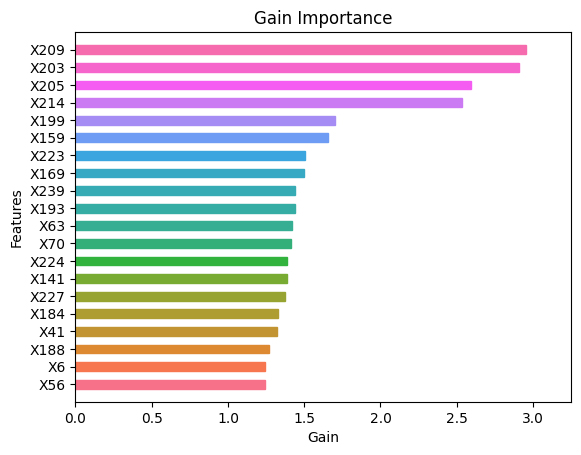

In [28]:
# 변수 중요도 시각화 (gain)
ax = plot_importance(final_clf, importance_type='gain', max_num_features=20, height=0.5, xlabel='Gain', title='Gain Importance', show_values=False, grid=False)
plt.gca().set_facecolor('white')  # 배경색을 흰색으로 설정

palette = sns.color_palette("husl", 20)

for bar, color in zip(ax.patches, palette):
    bar.set_color(color)
    
plt.show()

In [29]:
# XGBoost 모델의 변수 중요도를 얻기 위해 get_booster().get_score()를 사용
xgb_feature_importances = final_clf.get_booster().get_score(importance_type='gain')

# 변수 중요도를 기준으로 내림차순으로 정렬하여 상위 20개 변수를 선택
sorted_xgb_feature_importances = sorted(xgb_feature_importances.items(), key=lambda x: x[1], reverse=True)[:20]

# 선택된 변수들을 리스트로 변환
xgb_selected_features = [feature[0] for feature in sorted_xgb_feature_importances]

# 결과 확인
print("XGB selected features:", xgb_selected_features)

XGB selected features: ['X209', 'X203', 'X205', 'X214', 'X199', 'X159', 'X223', 'X169', 'X239', 'X193', 'X63', 'X70', 'X224', 'X141', 'X227', 'X184', 'X41', 'X188', 'X6', 'X56']


# [문제 2]

## - PCA 적용

In [30]:
from sklearn.decomposition import PCA

In [31]:
# 1. PCA 모델 선언
pca = PCA(n_components=0.8) # n_components를 갯수가 아닌 0.8로 설정하면, 80%만큼의 분산 설명을 하는 PC를 선정함

# 2. Train, Valid, Test 에 대해 적용
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

#데이터 프레임으로의 변환
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_valid_pca = pd.DataFrame(X_valid_pca, columns=[f'PC{i+1}' for i in range(X_valid_pca.shape[1])]) 
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])]) 

# PCA 주성분을 기존 데이터에 추가
X_train_aug = pd.concat([X_train_scaled.reset_index(drop=True), X_train_pca], axis=1)
X_valid_aug = pd.concat([X_valid_scaled.reset_index(drop=True), X_valid_pca], axis=1)
X_test_aug = pd.concat([X_test_scaled.reset_index(drop=True), X_test_pca], axis=1)

In [32]:
X_valid_aug

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133
0,-0.684639,-0.384636,-2.353629,-0.980911,-0.208534,-0.711471,-0.751686,0.924448,-0.814588,0.201905,...,-1.135027,-0.973634,1.275868,-1.721305,-0.365541,-0.158564,-0.482665,-1.705589,-0.901900,0.583989
1,0.852075,0.728424,0.255921,0.405591,-0.603740,-0.601428,-1.519382,-0.262967,-0.368987,0.620485,...,0.273205,-0.210646,-0.372625,-0.557723,1.221479,0.152484,0.008476,-1.205295,-0.332324,0.458573
2,-0.469446,0.050133,1.036283,-0.882393,-0.254675,-0.030023,-0.313042,0.232297,0.840013,-0.659518,...,0.914556,-1.125425,0.774952,0.512426,-0.057292,0.781684,-0.278046,-0.680789,0.781858,-0.022518
3,0.762525,1.212539,0.697187,0.904277,-0.110624,1.075356,0.118046,0.010573,1.482660,-0.200163,...,1.122580,-0.827152,-0.144058,0.385882,0.467445,1.278861,-0.284952,-0.368092,0.922460,1.235238
4,-0.198657,-0.121670,0.101669,-0.494305,0.215032,-0.045977,0.622777,0.260301,-0.980823,0.206121,...,-0.556120,1.208109,-0.078651,0.817092,-0.428124,0.605322,-0.933919,0.050064,0.306898,0.004995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,-0.327979,-0.925574,-0.427581,1.281890,0.283778,-0.644302,0.219242,0.488934,-0.465492,-0.108299,...,0.690958,0.645672,-0.213346,-0.302136,0.363940,-2.054557,-0.884246,-0.219283,0.752827,0.152331
1310,-1.410333,0.517977,0.426978,-0.402730,0.478893,1.578450,-0.105869,-1.899273,1.713869,-0.591367,...,0.512340,-0.562231,-0.980509,-0.482096,1.121230,0.350239,-0.377995,-0.086365,-0.682346,0.729498
1311,1.338797,-0.552007,-0.220582,0.694143,0.126823,-0.773080,2.271432,0.262565,-2.678249,-0.083267,...,0.917573,1.069347,0.152704,0.018119,-0.806944,-1.922143,1.051700,-0.669621,-0.370118,0.366194
1312,0.041052,0.187264,-1.594723,-0.424952,0.384244,-0.634312,-0.597747,-1.489414,-1.364391,0.276518,...,-0.474151,0.316067,0.684443,0.919408,-0.429457,0.454090,1.188355,0.229565,-0.106384,0.128490


In [33]:
# XGBoost 모델 학습
model_pca = xgb.XGBClassifier(use_label_encoder = False,
                        random_state = 21,
                        n_estimators = 100,
                        learning_rate = 0.4,
                        min_child_weight = 1,
                        colsample_bytree = 1,
                        max_depth =  6, 
                        gamma = 0, 
                        reg_lambda = 4.5,
                        eval_metric='logloss')


model_pca.fit(X_train_aug, y_train)

# 예측 및 평가
y_pred_train = model_pca.predict(X_train_aug)
y_pred_valid = model_pca.predict(X_valid_aug)
y_pred_test = model_pca.predict(X_test_aug)

# f1-score와 accuracy 출력
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
valid_f1_score = f1_score(y_valid, y_pred_valid, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

train_accuracy = accuracy_score(y_train, y_pred_train)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("F1-score:")
print(f"학습 데이터셋: {train_f1_score:.4f}")
print(f"검증 데이터셋: {valid_f1_score:.4f}")
print(f"테스트 데이터셋: {test_f1_score:.4f}")

print("\nAccuracy:")
print(f"학습 데이터셋: {train_accuracy:.4f}")
print(f"검증 데이터셋: {valid_accuracy:.4f}")
print(f"테스트 데이터셋: {test_accuracy:.4f}")



F1-score:
학습 데이터셋: 1.0000
검증 데이터셋: 0.6440
테스트 데이터셋: 0.6500

Accuracy:
학습 데이터셋: 1.0000
검증 데이터셋: 0.6438
테스트 데이터셋: 0.6499


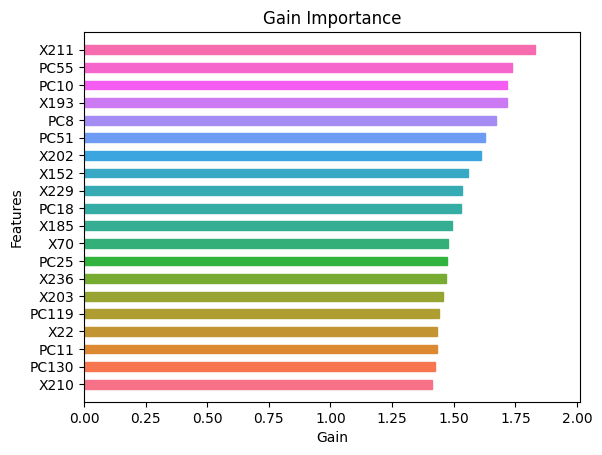

In [34]:
# 변수 중요도 시각화 (gain)
ax = plot_importance(model_pca, importance_type='gain', max_num_features=20, height=0.5, xlabel='Gain', title='Gain Importance', show_values=False, grid=False)
plt.gca().set_facecolor('white')  # 배경색을 흰색으로 설정

# Seaborn palette 적용
palette = sns.color_palette("husl", 20)

for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

plt.show()

In [35]:
# XGBoost 모델의 변수 중요도를 얻기 위해 get_booster().get_score()를 사용
xgb_pca_feature_importances = model_pca.get_booster().get_score(importance_type='gain')

# 변수 중요도를 기준으로 내림차순으로 정렬하여 상위 20개 변수를 선택
sorted_xgb_pca_feature_importances = sorted(xgb_pca_feature_importances.items(), key=lambda x: x[1], reverse=True)[:20]

# 선택된 변수들을 리스트로 변환
xgb_pca_selected_features = [feature[0] for feature in sorted_xgb_pca_feature_importances]

# 결과 확인
print("XGB & PCA selected features:", xgb_pca_selected_features)

XGB & PCA selected features: ['X211', 'PC55', 'PC10', 'X193', 'PC8', 'PC51', 'X202', 'X152', 'X229', 'PC18', 'X185', 'X70', 'PC25', 'X236', 'X203', 'PC119', 'X22', 'PC11', 'PC130', 'X210']


In [36]:
# 두 리스트에서 같은 feature와 다른 feature를 구분
xgb_set = set(xgb_selected_features)
xgb_pca_set = set(xgb_pca_selected_features)

# 같은 feature
common_features = xgb_set.intersection(xgb_pca_set)

# 서로 다른 feature
xgb_unique_features = xgb_set.difference(xgb_pca_set)
xgb_pca_unique_features = xgb_pca_set.difference(xgb_set)

# 결과 출력
print("Common features:", list(common_features))
print("XGB unique features:", list(xgb_unique_features))
print("XGB & PCA unique features:", list(xgb_pca_unique_features))

Common features: ['X70', 'X203', 'X193']
XGB unique features: ['X141', 'X6', 'X159', 'X41', 'X239', 'X169', 'X214', 'X209', 'X224', 'X199', 'X227', 'X63', 'X188', 'X56', 'X184', 'X205', 'X223']
XGB & PCA unique features: ['X210', 'PC8', 'X152', 'PC25', 'PC11', 'X185', 'X229', 'PC130', 'X202', 'X211', 'PC119', 'PC10', 'X236', 'PC55', 'X22', 'PC51', 'PC18']


In [37]:
# 주성분 로딩 확인
loadings = pca.components_.T  # 각 변수의 주성분 기여도

# 특정 변수 X209의 기여도 확인
x209_loading = loadings[210]  # 인덱스 210는 변수 'X209'에 해당

# X13이 가장 크게 작용한 주성분 찾기
max_loading_index = np.argmax(np.abs(x209_loading))  # 절대값이 가장 큰 인덱스
max_loading_value = x209_loading[max_loading_index]

print(f"X209이 가장 크게 작용한 주성분: PC{max_loading_index + 1}")
print(f"해당 주성분에서 X209의 기여도: {max_loading_value}")

X209이 가장 크게 작용한 주성분: PC76
해당 주성분에서 X209의 기여도: 0.2142671634011052


In [30]:
# X58 는 PC33에 가장 큰 영향을 미침

# [문제 3]

## Blending 활용

In [38]:
# pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\bonun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
#LR, LightGBM, SVM, RandomForest
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
# 모델 정의
models = {
    'lr': LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs'),
    'svc': SVC(probability=True, C=1.0, kernel='rbf', gamma='scale'),
    'rf': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1,random_state=57),
    'lgb': lgb.LGBMClassifier(
                                n_estimators=100,
                                learning_rate=0.4,
                                num_leaves=30, 
                                min_child_weight=5,  # min_child_weight 증가
                                max_depth=6,
                                reg_lambda=2,
                                early_stopping_rounds=10, 
                                verbose=-1
    )
    
}

#예측 결과 저장할 list 선언
val_preds = []
test_preds = []

X_train_aug = X_train_aug.astype('float32')
X_valid_aug = X_valid_aug.astype('float32')
X_test_aug = X_test_aug.astype('float32')

# 모델 학습 및 예측 light GBM은 eval_set을 만들어준 후에 실험을 진행해야 해서 입력모델에 따라 다르게 작동하도록 함
for name, model in models.items():
    if name == 'lgb':
        model.fit(
            X_train_aug, y_train, 
            eval_set=[(X_valid_aug, y_valid)],  # validation 데이터셋 추가
            eval_metric='logloss',  # 평가 지표 추가
       )
    else:
        model.fit(X_train_aug, y_train)
    
    
    # Valid 와 Test set에 대한 예측 결과 listd에 append하여 저장 
    val_pred = pd.DataFrame(model.predict(X_valid_aug), columns=[f'pred_{name}'])
    test_pred = pd.DataFrame(model.predict(X_test_aug), columns=[f'pred_{name}'])
    
    val_preds.append(val_pred)
    test_preds.append(test_pred)

    
# 원래 feature와 예측값을 결합하여 새로운 데이터셋 생성
df_val = pd.concat([pd.DataFrame(X_valid_aug)] + val_preds, axis=1)
df_test = pd.concat([pd.DataFrame(X_test_aug)] + test_preds, axis=1)

# 모든 컬럼 이름을 문자열로 변환, 앞선,Numpy to DataFrame 변환과정에서 정수형으로 저장된 열이 있으므로 수정해줌
df_val.columns = df_val.columns.astype(str)
df_test.columns = df_test.columns.astype(str)



In [42]:
# 메타 모델 정의 및 학습
meta_model = XGBClassifier(use_label_encoder = False,
                        random_state = 21,
                        n_estimators = 100,
                        learning_rate = 0.4,
                        min_child_weight = 1,
                        colsample_bytree = 1,
                        max_depth =  6, 
                        gamma = 0, 
                        reg_lambda = 2,
                        eval_metric='logloss')

meta_model.fit(df_val, y_valid)

# 최종 예측
final_pred = meta_model.predict(df_test)

# 예측 및 평가( validation과 testset에 대해서만 적용)
y_pred_valid = meta_model.predict(df_val)
y_pred_test = meta_model.predict(df_test)

# f1-score와 accuracy 출력
valid_f1_score = f1_score(y_valid, y_pred_valid, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

valid_accuracy = accuracy_score(y_valid, y_pred_valid)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("F1-score:")
print(f"검증 데이터셋: {valid_f1_score:.4f}")
print(f"테스트 데이터셋: {test_f1_score:.4f}")

print("\nAccuracy:")
print(f"검증 데이터셋: {valid_accuracy:.4f}")
print(f"테스트 데이터셋: {test_accuracy:.4f}")



F1-score:
검증 데이터셋: 1.0000
테스트 데이터셋: 0.7046

Accuracy:
검증 데이터셋: 1.0000
테스트 데이터셋: 0.7047
